# Task : 03

* Building a decision Tree to predict wether a customer will buy a particular service or not based upon his previous behaviour.

# Dataset Information

* Additional Information :
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
# Importing the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score
import pickle

In [2]:
# Connecting the dataset:

In [3]:
df = pd.read_csv("E:\\BRS\\Shrish_Simran\\prodigy_int\\bank\\bank-full.csv" , delimiter=";")

In [4]:
# Printing the dataset:

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


* The shape of the dataset is : (45211R X 17C).

In [6]:
# dataset statistics / Summary :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are no null values present :1

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Checking all the columns:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
# Checking all the unique  values for all the categorical columns:

df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [10]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [12]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [13]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

* Now , for numerical varibles we have to check it , if outliers are available :

<Axes: >

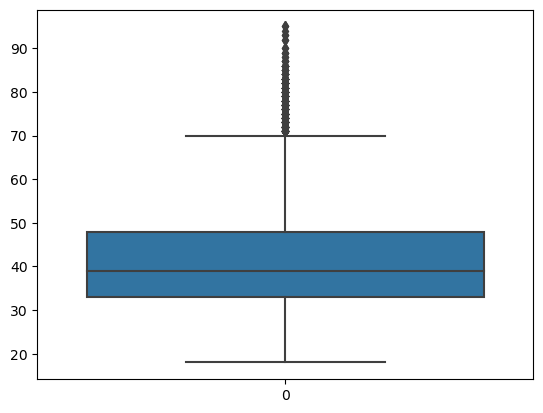

In [14]:
sns.boxplot(df['age'])

<Axes: >

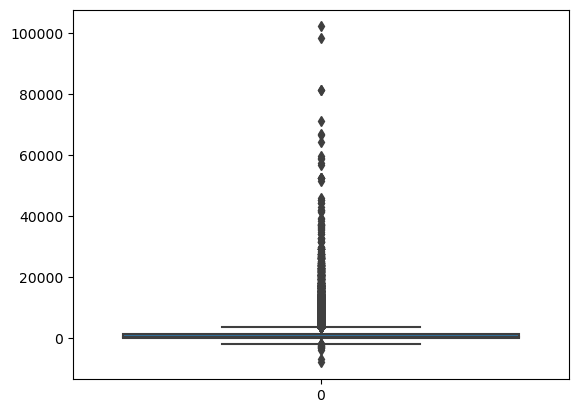

In [15]:
sns.boxplot(df['balance'])

<Axes: >

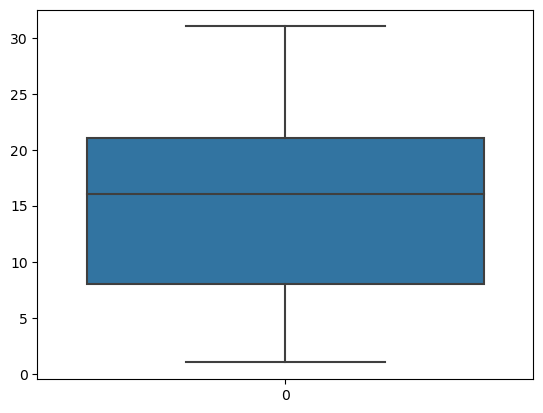

In [16]:
sns.boxplot(df['day'])

<Axes: >

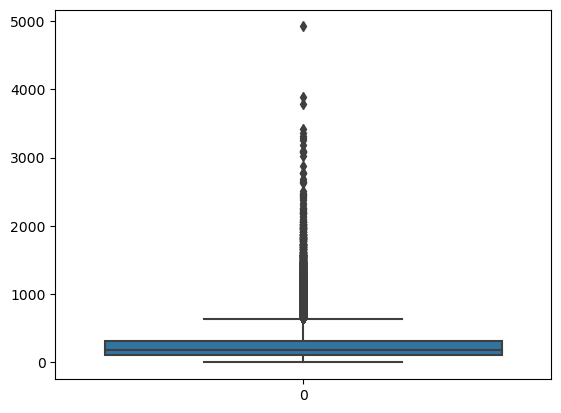

In [17]:
sns.boxplot(df['duration'])

<Axes: >

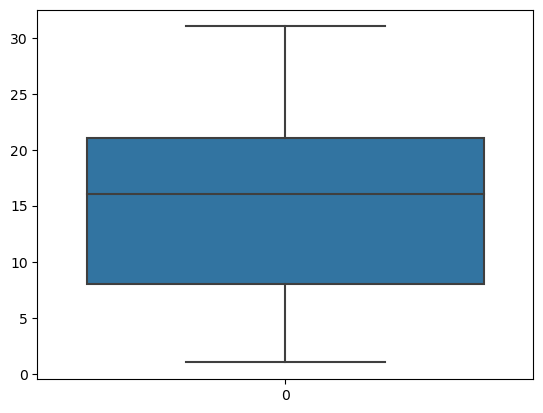

In [18]:
sns.boxplot(df['day'])

<Axes: >

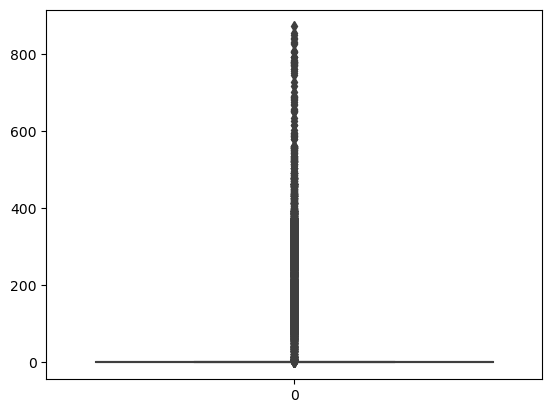

In [19]:
sns.boxplot(df['pdays'])

<Axes: >

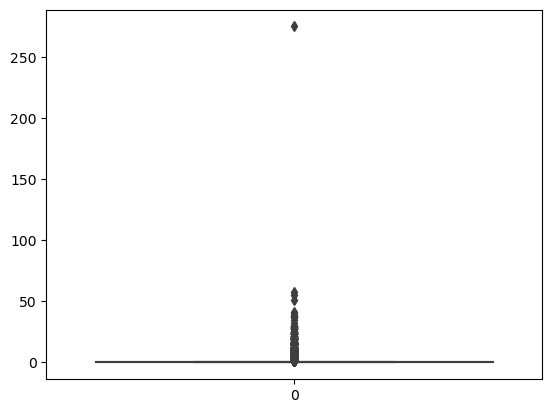

In [20]:
sns.boxplot(df['previous'])

#  Insights :

* From the above analysis we came to know that almost all of the numerical columns contains some Outliers :
To proceed further , first we have to encounter with these Outliers:

* Creating a function to count the interquartile range  so that we can fix the outliers above or bwlow it using the mean or median of that particular column:

In [21]:
# With Mean:
def remove_ow_mean(df , column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df.loc[df[column_name] < lower_bound, column_name] = df[column_name].mean()
    df.loc[df[column_name] > upper_bound, column_name] = df[column_name].mean()
    return sns.boxplot(df[column_name])

In [22]:
# With Median :
def remove_ow_median(df , column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df.loc[df[column_name] < lower_bound, column_name] = df[column_name].median()
    df.loc[df[column_name] > upper_bound, column_name] = df[column_name].median()
    return sns.boxplot(df[column_name])

<Axes: >

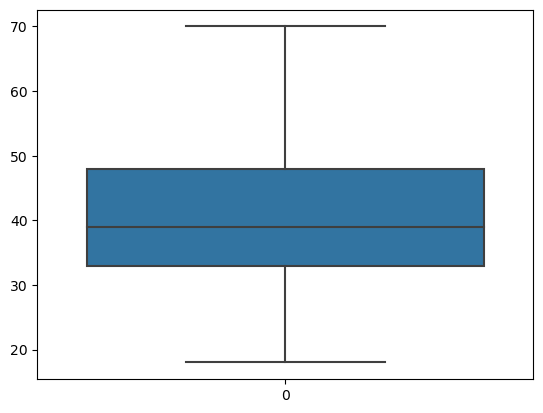

In [23]:
remove_ow_mean(df,'age')

<Axes: >

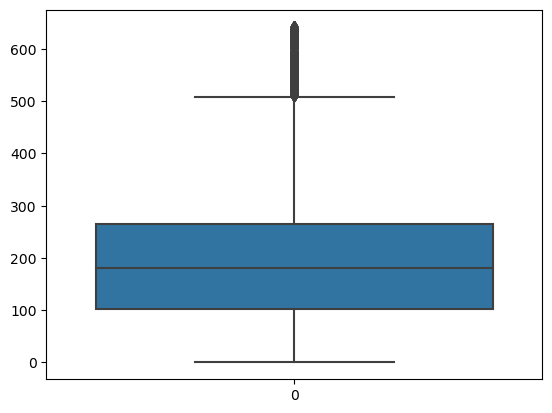

In [24]:
remove_ow_median(df,'duration')

<Axes: >

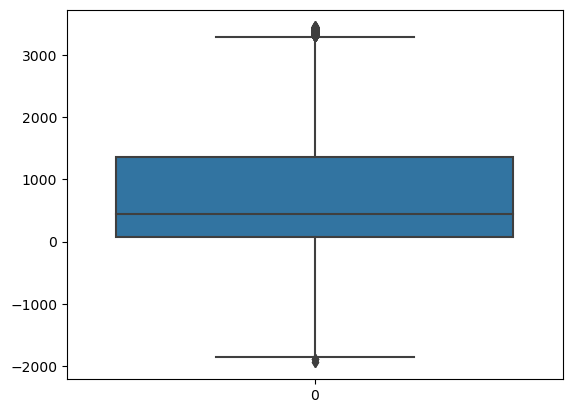

In [25]:
remove_ow_mean(df,'balance')

<Axes: >

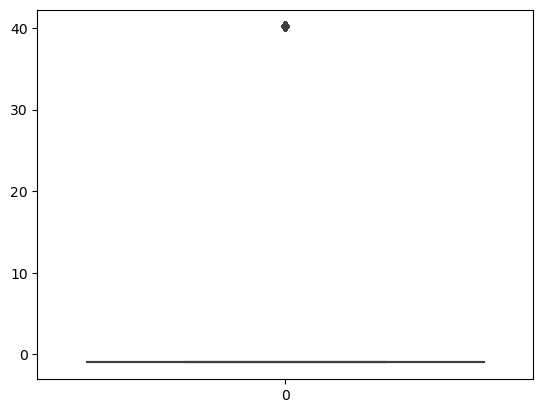

In [26]:
remove_ow_mean(df,'pdays')

<Axes: >

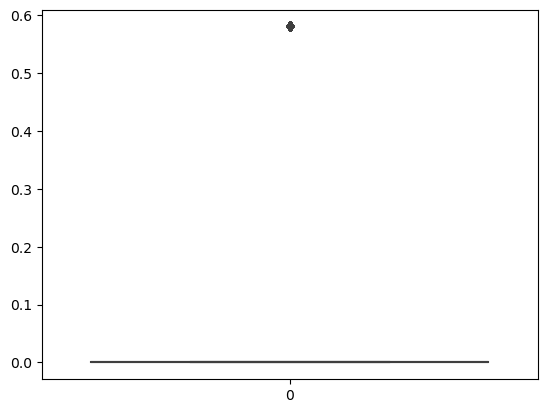

In [27]:
remove_ow_mean(df,'previous')

* Now our dataset has few outliers which couldn't affect our ML Modeling much :

In [28]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.00000,management,married,tertiary,no,2143.000000,yes,no,unknown,5,may,261,1,-1.000000,0.000000,unknown,no
1,44.00000,technician,single,secondary,no,29.000000,yes,no,unknown,5,may,151,1,-1.000000,0.000000,unknown,no
2,33.00000,entrepreneur,married,secondary,no,2.000000,yes,yes,unknown,5,may,76,1,-1.000000,0.000000,unknown,no
3,47.00000,blue-collar,married,unknown,no,1506.000000,yes,no,unknown,5,may,92,1,-1.000000,0.000000,unknown,no
4,33.00000,unknown,single,unknown,no,1.000000,no,no,unknown,5,may,198,1,-1.000000,0.000000,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.00000,technician,married,tertiary,no,825.000000,no,no,cellular,17,nov,180,3,-1.000000,0.000000,unknown,yes
45207,40.93621,retired,divorced,primary,no,1729.000000,no,no,cellular,17,nov,456,2,-1.000000,0.000000,unknown,yes
45208,40.93621,retired,married,secondary,no,1363.964315,no,no,cellular,17,nov,180,5,40.197828,0.580323,success,yes
45209,57.00000,blue-collar,married,secondary,no,668.000000,no,no,telephone,17,nov,508,4,-1.000000,0.000000,unknown,no


# Manual encoding 

In [29]:
df["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [30]:
df['education'] = df['education'].map({'tertiary':3 ,'secondary':2 , 'primary':1 , 'unknown': 1 })

In [31]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.00000,management,married,3,no,2143.000000,yes,no,unknown,5,may,261,1,-1.000000,0.000000,unknown,no
1,44.00000,technician,single,2,no,29.000000,yes,no,unknown,5,may,151,1,-1.000000,0.000000,unknown,no
2,33.00000,entrepreneur,married,2,no,2.000000,yes,yes,unknown,5,may,76,1,-1.000000,0.000000,unknown,no
3,47.00000,blue-collar,married,1,no,1506.000000,yes,no,unknown,5,may,92,1,-1.000000,0.000000,unknown,no
4,33.00000,unknown,single,1,no,1.000000,no,no,unknown,5,may,198,1,-1.000000,0.000000,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.00000,technician,married,3,no,825.000000,no,no,cellular,17,nov,180,3,-1.000000,0.000000,unknown,yes
45207,40.93621,retired,divorced,1,no,1729.000000,no,no,cellular,17,nov,456,2,-1.000000,0.000000,unknown,yes
45208,40.93621,retired,married,2,no,1363.964315,no,no,cellular,17,nov,180,5,40.197828,0.580323,success,yes
45209,57.00000,blue-collar,married,2,no,668.000000,no,no,telephone,17,nov,508,4,-1.000000,0.000000,unknown,no


In [32]:
df['housing'] = df['housing'].map({"yes":1,"no":0})

In [33]:
df['loan'] = df['loan'].map({"yes":0,"no":1})

In [34]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.00000,management,married,3,no,2143.000000,1,1,unknown,5,may,261,1,-1.000000,0.000000,unknown,no
1,44.00000,technician,single,2,no,29.000000,1,1,unknown,5,may,151,1,-1.000000,0.000000,unknown,no
2,33.00000,entrepreneur,married,2,no,2.000000,1,0,unknown,5,may,76,1,-1.000000,0.000000,unknown,no
3,47.00000,blue-collar,married,1,no,1506.000000,1,1,unknown,5,may,92,1,-1.000000,0.000000,unknown,no
4,33.00000,unknown,single,1,no,1.000000,0,1,unknown,5,may,198,1,-1.000000,0.000000,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.00000,technician,married,3,no,825.000000,0,1,cellular,17,nov,180,3,-1.000000,0.000000,unknown,yes
45207,40.93621,retired,divorced,1,no,1729.000000,0,1,cellular,17,nov,456,2,-1.000000,0.000000,unknown,yes
45208,40.93621,retired,married,2,no,1363.964315,0,1,cellular,17,nov,180,5,40.197828,0.580323,success,yes
45209,57.00000,blue-collar,married,2,no,668.000000,0,1,telephone,17,nov,508,4,-1.000000,0.000000,unknown,no


In [35]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [36]:
df['y'] = df['y'].map({'yes':1,"no":0})

In [37]:
# Label Encoding :

In [38]:
data = df.copy()
# Create a LabelEncoder object
encoder = LabelEncoder()

df['job'] = encoder.fit_transform(df['job'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.00000,4,married,3,no,2143.000000,1,1,unknown,5,may,261,1,-1.000000,0.000000,unknown,0
1,44.00000,9,single,2,no,29.000000,1,1,unknown,5,may,151,1,-1.000000,0.000000,unknown,0
2,33.00000,2,married,2,no,2.000000,1,0,unknown,5,may,76,1,-1.000000,0.000000,unknown,0
3,47.00000,1,married,1,no,1506.000000,1,1,unknown,5,may,92,1,-1.000000,0.000000,unknown,0
4,33.00000,11,single,1,no,1.000000,0,1,unknown,5,may,198,1,-1.000000,0.000000,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.00000,9,married,3,no,825.000000,0,1,cellular,17,nov,180,3,-1.000000,0.000000,unknown,1
45207,40.93621,5,divorced,1,no,1729.000000,0,1,cellular,17,nov,456,2,-1.000000,0.000000,unknown,1
45208,40.93621,5,married,2,no,1363.964315,0,1,cellular,17,nov,180,5,40.197828,0.580323,success,1
45209,57.00000,1,married,2,no,668.000000,0,1,telephone,17,nov,508,4,-1.000000,0.000000,unknown,0


In [39]:
df['marital'] = encoder.fit_transform(df['marital'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.00000,4,1,3,no,2143.000000,1,1,unknown,5,may,261,1,-1.000000,0.000000,unknown,0
1,44.00000,9,2,2,no,29.000000,1,1,unknown,5,may,151,1,-1.000000,0.000000,unknown,0
2,33.00000,2,1,2,no,2.000000,1,0,unknown,5,may,76,1,-1.000000,0.000000,unknown,0
3,47.00000,1,1,1,no,1506.000000,1,1,unknown,5,may,92,1,-1.000000,0.000000,unknown,0
4,33.00000,11,2,1,no,1.000000,0,1,unknown,5,may,198,1,-1.000000,0.000000,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.00000,9,1,3,no,825.000000,0,1,cellular,17,nov,180,3,-1.000000,0.000000,unknown,1
45207,40.93621,5,0,1,no,1729.000000,0,1,cellular,17,nov,456,2,-1.000000,0.000000,unknown,1
45208,40.93621,5,1,2,no,1363.964315,0,1,cellular,17,nov,180,5,40.197828,0.580323,success,1
45209,57.00000,1,1,2,no,668.000000,0,1,telephone,17,nov,508,4,-1.000000,0.000000,unknown,0


In [40]:
df['contact'] = encoder.fit_transform(df['contact'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.00000,4,1,3,no,2143.000000,1,1,2,5,may,261,1,-1.000000,0.000000,unknown,0
1,44.00000,9,2,2,no,29.000000,1,1,2,5,may,151,1,-1.000000,0.000000,unknown,0
2,33.00000,2,1,2,no,2.000000,1,0,2,5,may,76,1,-1.000000,0.000000,unknown,0
3,47.00000,1,1,1,no,1506.000000,1,1,2,5,may,92,1,-1.000000,0.000000,unknown,0
4,33.00000,11,2,1,no,1.000000,0,1,2,5,may,198,1,-1.000000,0.000000,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.00000,9,1,3,no,825.000000,0,1,0,17,nov,180,3,-1.000000,0.000000,unknown,1
45207,40.93621,5,0,1,no,1729.000000,0,1,0,17,nov,456,2,-1.000000,0.000000,unknown,1
45208,40.93621,5,1,2,no,1363.964315,0,1,0,17,nov,180,5,40.197828,0.580323,success,1
45209,57.00000,1,1,2,no,668.000000,0,1,1,17,nov,508,4,-1.000000,0.000000,unknown,0


* Dropping down the useless columns from our dataset:

In [41]:
df = df.drop(columns=['poutcome'])
df = df.drop(columns = ['month'])
df = df.drop(columns = ['default'])

In [42]:
df

,age,job,marital,education,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y
0,58.00000,4,1,3,2143.000000,1,1,2,5,261,1,-1.000000,0.000000,0
1,44.00000,9,2,2,29.000000,1,1,2,5,151,1,-1.000000,0.000000,0
2,33.00000,2,1,2,2.000000,1,0,2,5,76,1,-1.000000,0.000000,0
3,47.00000,1,1,1,1506.000000,1,1,2,5,92,1,-1.000000,0.000000,0
4,33.00000,11,2,1,1.000000,0,1,2,5,198,1,-1.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.00000,9,1,3,825.000000,0,1,0,17,180,3,-1.000000,0.000000,1
45207,40.93621,5,0,1,1729.000000,0,1,0,17,456,2,-1.000000,0.000000,1
45208,40.93621,5,1,2,1363.964315,0,1,0,17,180,5,40.197828,0.580323,1
45209,57.00000,1,1,2,668.000000,0,1,1,17,508,4,-1.000000,0.000000,0


* Oure dataset is now ready for the ML Modeling :
* Let's build up a ML Decision Tree Model onto it and find out wether it's working fine onto it or not:

# Splitting the dataset into dependent and independent parameters:

In [43]:
X = df.drop('y',axis=1)

In [44]:
X

,age,job,marital,education,balance,housing,loan,contact,day,duration,campaign,pdays,previous
0,58.00000,4,1,3,2143.000000,1,1,2,5,261,1,-1.000000,0.000000
1,44.00000,9,2,2,29.000000,1,1,2,5,151,1,-1.000000,0.000000
2,33.00000,2,1,2,2.000000,1,0,2,5,76,1,-1.000000,0.000000
3,47.00000,1,1,1,1506.000000,1,1,2,5,92,1,-1.000000,0.000000
4,33.00000,11,2,1,1.000000,0,1,2,5,198,1,-1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.00000,9,1,3,825.000000,0,1,0,17,180,3,-1.000000,0.000000
45207,40.93621,5,0,1,1729.000000,0,1,0,17,456,2,-1.000000,0.000000
45208,40.93621,5,1,2,1363.964315,0,1,0,17,180,5,40.197828,0.580323
45209,57.00000,1,1,2,668.000000,0,1,1,17,508,4,-1.000000,0.000000


In [45]:
y = df['y']

In [46]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

# Train-Test Split

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.22 , random_state=2)

In [48]:
X_train

,age,job,marital,education,balance,housing,loan,contact,day,duration,campaign,pdays,previous
43544,45.0,1,2,2,0.000000,1,1,0,26,180,1,40.197828,0.580323
40371,58.0,4,1,2,111.000000,0,1,1,22,39,1,40.197828,0.580323
27024,31.0,6,1,3,5.000000,1,0,0,21,635,1,40.197828,0.580323
29129,34.0,9,1,1,1301.000000,0,1,0,2,56,1,-1.000000,0.000000
3516,44.0,9,1,2,185.000000,1,1,2,15,194,2,-1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44566,34.0,7,1,2,-52.000000,0,1,2,13,12,1,-1.000000,0.000000
30280,59.0,5,0,1,1363.964315,0,1,0,5,150,1,-1.000000,0.000000
6637,59.0,4,0,2,0.000000,1,1,2,28,248,6,-1.000000,0.000000
35343,29.0,1,2,2,2891.000000,1,1,0,7,293,1,-1.000000,0.000000


In [49]:
dt = DecisionTreeClassifier()

In [50]:
# Implementing gridsearchCV to get best parameters for our prediction:

In [51]:
parameters = {
    "criterion" : [ 'gini' , 'entropy' , 'log_loss'],
    "splitter" : [ 'best', 'random'],
    "max_depth" : [ None , 1 , 2 , 3 , 4 , 5 ]
}

In [52]:
grid_search = GridSearchCV(dt, parameters , cv=5, scoring='accuracy')  


In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [54]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [55]:
# Print the best parameters and scores
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
Best Cross-Validation Score: 0.8904549372915014


In [56]:
classifier = DecisionTreeClassifier(criterion="log_loss",splitter="best",max_depth= 5)

In [57]:
# Fit the model on training data (X_train, y_train)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5)

[Text(0.47291666666666665, 0.9166666666666666, 'x[9] <= 179.5\nlog_loss = 0.522\nsamples = 35264\nvalue = [31127, 4137]'),
 Text(0.2125, 0.75, 'x[9] <= 88.5\nlog_loss = 0.198\nsamples = 17551\nvalue = [17011, 540]'),
 Text(0.09166666666666666, 0.5833333333333334, 'x[9] <= 62.5\nlog_loss = 0.058\nsamples = 6964\nvalue = [6917, 47]'),
 Text(0.05, 0.4166666666666667, 'x[10] <= 2.5\nlog_loss = 0.021\nsamples = 3886\nvalue = [3878, 8]'),
 Text(0.03333333333333333, 0.25, 'x[7] <= 0.5\nlog_loss = 0.039\nsamples = 1890\nvalue = [1882, 8]'),
 Text(0.016666666666666666, 0.08333333333333333, 'log_loss = 0.012\nsamples = 930\nvalue = [929, 1]'),
 Text(0.05, 0.08333333333333333, 'log_loss = 0.062\nsamples = 960\nvalue = [953, 7]'),
 Text(0.06666666666666667, 0.25, 'log_loss = 0.0\nsamples = 1996\nvalue = [1996, 0]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[4] <= 187.5\nlog_loss = 0.098\nsamples = 3078\nvalue = [3039, 39]'),
 Text(0.1, 0.25, 'x[2] <= 0.5\nlog_loss = 0.04\nsamples = 1146\nv

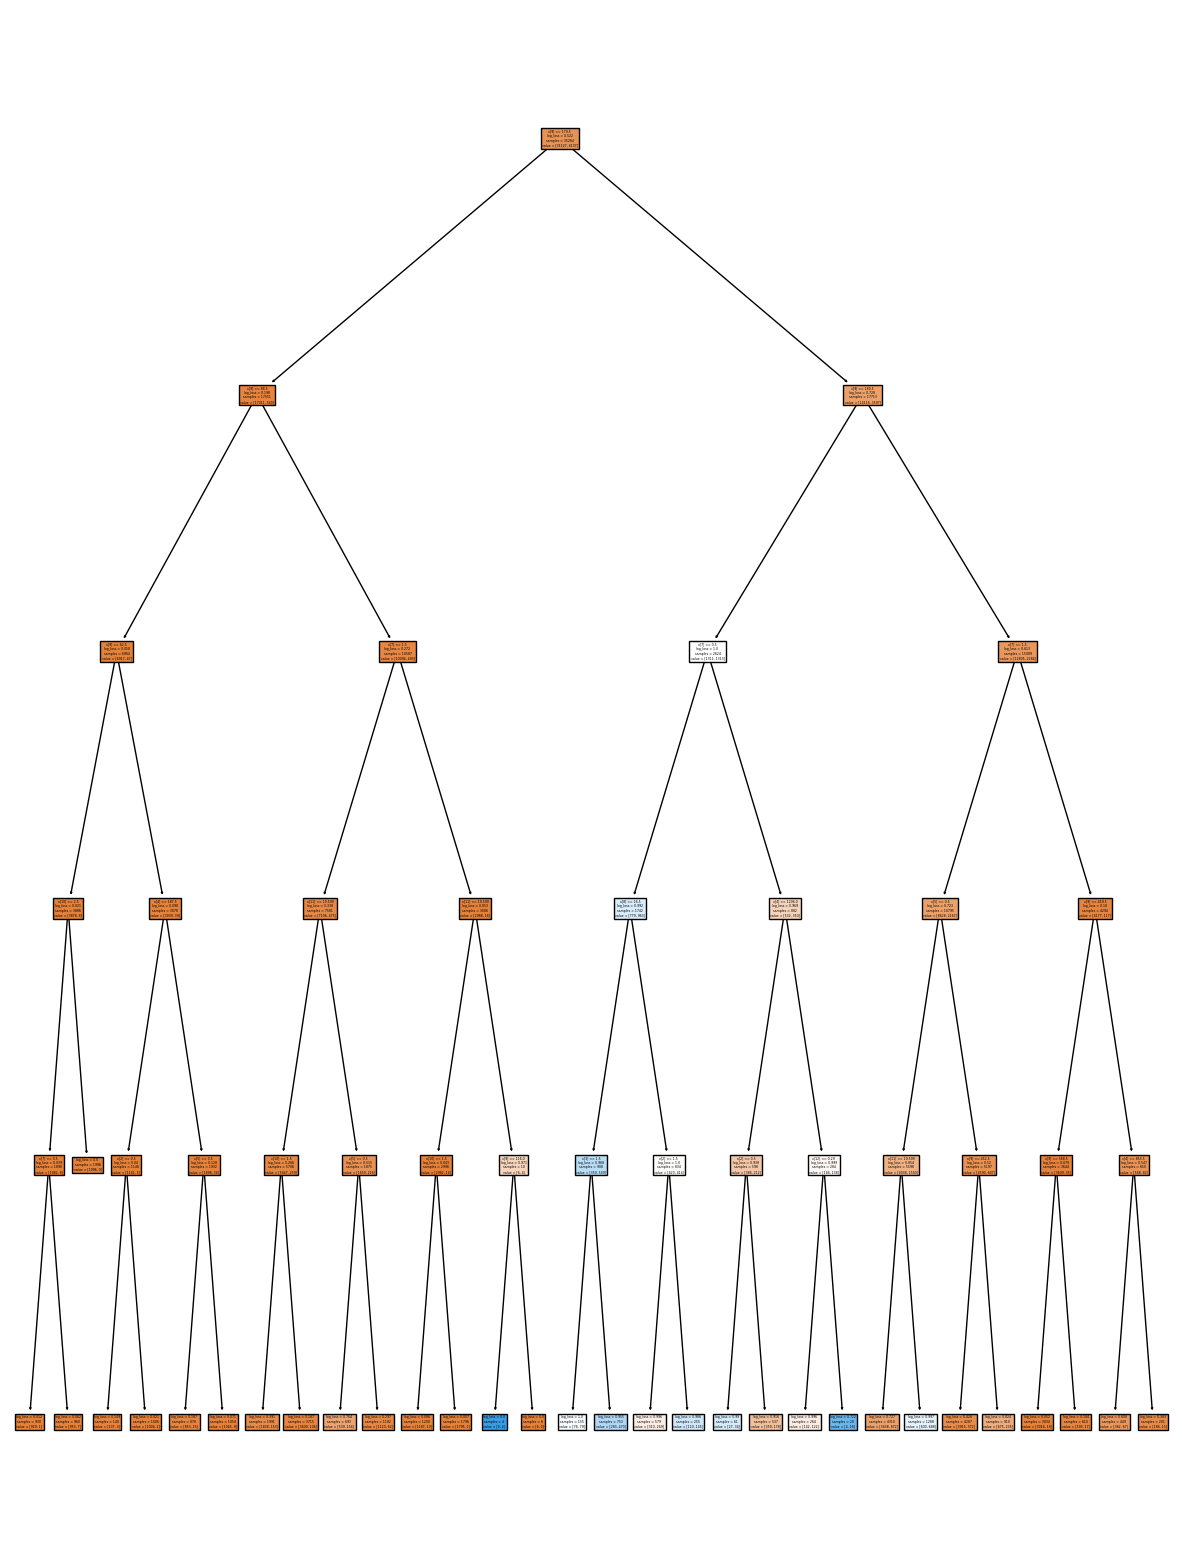

In [58]:
plt.figure(figsize=(15,20))
tree.plot_tree(classifier,filled=True)

In [59]:

# Make predictions on unseen data (X_test)
predictions = classifier.predict(X_test)

In [60]:
predictions

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [61]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8899165577561073
